In [1]:
import pandas as pd
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam
%matplotlib inline
import random
import pandas, numpy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# this wrapper makes it possible to train on subset of features
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
# import xgboost as xgb
from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

Using TensorFlow backend.


Welcome to JupyROOT 6.16/00


In [2]:
signal = '/afs/cern.ch/user/s/sraj/public/data_folder/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back_1 = '/afs/cern.ch/user/s/sraj/public/data_folder/signal.root'
back_2 = '/afs/cern.ch/user/s/sraj/public/data_folder/back.root'
back_3 = '/afs/cern.ch/user/s/sraj/public/data_folder/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
# out_dir = '/afs/cern.ch/user/s/sraj/public/plot'
#Calling out the folder in which the data is stored
treeName_back_1 ="tagsDumper/trees/tth_125_13TeV_THQLeptonicTag" 
treeName_back_2 ="tagsDumper/trees/thq_125_13TeV_THQLeptonicTag" 
treeName_back_3 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
columns = ['dipho_pt',
           'dipho_phi',
           'dipho_eta',
           'dipho_e',
           'dipho_mass',
           'dipho_leadPt',
           'dipho_leadEt',
           'dipho_leadEta',
           'dipho_leadPhi',
           'dipho_subleadEta',
           'bjet1_pt',
           'bjet2_pt',
           'bjet1_eta',
           'bjet2_eta',
           'jet1_pt',
           'jet2_pt',
           'jet1_eta',
           'n_jets',
           'n_bjets',
           'bjet2_phi',
           'bjet3_phi',
#            'bjet3_eta',
           'bjet1_discr',
           'bjet2_discr',
           'bjet3_discr',
           'jet3_pt',
#           'jet1_phi',
#          'jet2_phi' ,
          'jet3_phi',
          'jet1_e',
          'jet2_e',
          'jet3_e',
#            'CMS_hgg_mass',
#             'sigmaMoM_decorr',
#             'dipho_sumpt',
#             'dipho_cosphi',
# #             'dipho_mass',
#             'dipho_lead_ptoM',
#             'ele1_pt',
#             'ele2_pt',
#             'ele1_eta',
#             'ele2_eta',
#             'ele1_phi',
#             'ele2_phi',
#             'ele1_e',
#             'ele2_e',
#             'ele1_ch',
#             'ele2_ch',
          ]


#Data is converted to array
mc_arr = root2array(signal, treeName_signal, columns)
data_arr_1 = root2array(back_1, treeName_back_1, columns)
data_arr_2 = root2array(back_2, treeName_back_2, columns)
data_arr_3 = root2array(back_3, treeName_back_3, columns)

data_arr= np.concatenate((data_arr_1, data_arr_2, data_arr_3),axis =0)

signal_array = rec2array(mc_arr)
backgr_array = rec2array(data_arr)


In [3]:
data_arr_1.shape


(92486,)

In [4]:
data_arr_2.shape

(338874,)

In [5]:
data_arr_3.shape

(55847,)

In [6]:
signal = pd.DataFrame(signal_array)
backgr = pd.DataFrame(backgr_array)

In [7]:
##Define X and y from the given files
X = np.concatenate((signal, backgr))
Y = np.concatenate((np.ones(signal.shape[0]),
                    np.zeros(backgr.shape[0])))


In [8]:
Xtrain,Xtest, Ytrain,Ytest = train_test_split(X, Y, test_size=0.33, random_state= 5)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint

# from keras.optimizers import Adam


In [10]:
#define model for training

clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(Dropout(3,input_shape = (29,)))
clf.add(Dense(200, activation = 'relu', kernel_initializer = 'lecun_uniform',name = 'dense_1'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform',name = 'dense_2'))
clf.add(Dense(60, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_3'))
clf.add(Dense(50, activation = 'relu', kernel_initializer = 'lecun_uniform',name = 'dense_4'))
clf.add(Dense(30, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_5'))
#Output
clf.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model
clf.compile(loss = 'binary_crossentropy', 
            optimizer='adam',
            metrics=['accuracy'])
# print(clf.summary())
# plot_model(clf, to_file='clf_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
h = clf.fit(Xtrain, Ytrain, epochs = 100, batch_size= 9000, validation_split = 0.25)

Train on 285530 samples, validate on 95177 samples
Epoch 1/100
285530/285530 [==============================] - 2s 8us/step - loss: 2.5021 - acc: 0.8161 - val_loss: 1.9879 - val_acc: 0.7513
Epoch 2/100
285530/285530 [==============================] - 1s 4us/step - loss: 1.6009 - acc: 0.8357 - val_loss: 1.4815 - val_acc: 0.8325
Epoch 3/100
285530/285530 [==============================] - 1s 4us/step - loss: 1.4534 - acc: 0.8472 - val_loss: 1.4497 - val_acc: 0.8533
Epoch 4/100
285530/285530 [==============================] - 1s 5us/step - loss: 1.4346 - acc: 0.8511 - val_loss: 1.4468 - val_acc: 0.8409
Epoch 5/100
285530/285530 [==============================] - 2s 7us/step - loss: 1.5173 - acc: 0.8378 - val_loss: 1.4448 - val_acc: 0.8542
Epoch 6/100
285530/285530 [==============================] - 2s 6us/step - loss: 1.4303 - acc: 0.8521 - val_loss: 1.4324 - val_acc: 0.8540
Epoch 7/100
285530/285530 [==============================] - 2s 6us/step - loss: 1.4120 - acc: 0.8532 - val_loss: 1

285530/285530 [==============================] - 2s 8us/step - loss: 0.3108 - acc: 0.8619 - val_loss: 0.3161 - val_acc: 0.8598
Epoch 60/100
285530/285530 [==============================] - 2s 7us/step - loss: 0.3116 - acc: 0.8620 - val_loss: 0.3140 - val_acc: 0.8615
Epoch 61/100
285530/285530 [==============================] - 2s 6us/step - loss: 0.3123 - acc: 0.8614 - val_loss: 0.3182 - val_acc: 0.8586
Epoch 62/100
285530/285530 [==============================] - 1s 5us/step - loss: 0.3120 - acc: 0.8615 - val_loss: 0.3151 - val_acc: 0.8608
Epoch 63/100
285530/285530 [==============================] - 2s 5us/step - loss: 0.3108 - acc: 0.8619 - val_loss: 0.3134 - val_acc: 0.8616
Epoch 64/100
285530/285530 [==============================] - 2s 5us/step - loss: 0.3105 - acc: 0.8626 - val_loss: 0.3141 - val_acc: 0.8612
Epoch 65/100
285530/285530 [==============================] - 1s 5us/step - loss: 0.3098 - acc: 0.8624 - val_loss: 0.3147 - val_acc: 0.8605
Epoch 66/100
285530/285530 [=====

2021-10-11 13:20:26.293295: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [12]:
# Final evaluation of the model for DNN
scores = clf.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.84%


In [14]:
# Final evaluation of the model for DNN
scores = clf.evaluate(Xtrain, Ytrain, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.18%


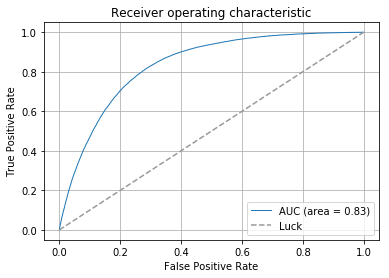

In [15]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict_proba(Xtest)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(Ytest,decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AUC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("ROC_curve_TPrime_ttgg_&tth&thq.png")
plt.show()

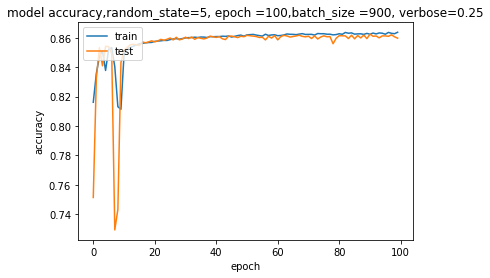

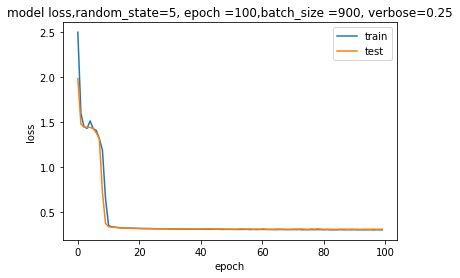

In [16]:
# summarize history for accuracy
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy,random_state=5, epoch =100,batch_size =900, verbose=0.25')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_accuracy_TPrime_ttgg_&tth&thq.png')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss,random_state=5, epoch =100,batch_size =900, verbose=0.25')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('loss_TPrime_ttgg_&tth&thq.png')
plt.show()

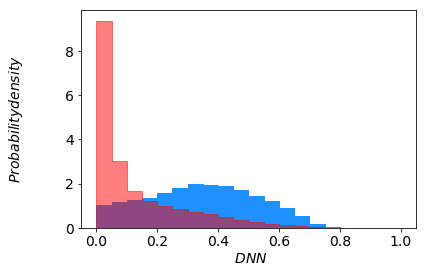

In [17]:
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict_proba(Xtest)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[Ytest==0]
tSig = tTest[Ytest==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=True, color ='dodgerblue' )
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=True,color = 'red' ,alpha=0.5)
plt.savefig('output_TPrime_ttgg_&tth&thq.png')
plt.show()